<a href="https://colab.research.google.com/github/tuanle277/Xtern_2024_AI_prompt/blob/main/AI_work_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a model to predict a customers order from their available information.

1. Outline your process for model selection, training and testing. Including data preparation.
2. Design a function that prepares your data by loading the provided dataset and processes it into an appropriate machine readable format if necessary.
3. Design a function to train your model and pickle it.
4. Train and test your model.  Submit any training, testing and model selection visuals or metrics.
5. Upload your work to GitHub and link the repository, make sure it is public.

In [1]:
import numpy as np

In [2]:
import pandas as pd
path_menu, path_order = "https://github.com/tuanle277/Xtern_2024_AI_prompt/blob/main/XTern%202024%20Artificial%20Intelegence%20Data%20Set%20-%20Menu.csv?raw=True", "https://github.com/tuanle277/Xtern_2024_AI_prompt/blob/main/XTern%202024%20Artificial%20Intelegence%20Data%20Set%20-%20Xtern_TrainData.csv?raw=True"

order_df, menu_df = pd.read_csv(path_order, on_bad_lines="skip"), pd.read_csv(path_menu, on_bad_lines="skip")
order_df = pd.merge(order_df, menu_df, left_on='Order', right_on='Item', how='left')

In [3]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'University', 'Major', 'Year' and 'Order'
le_university_name = LabelEncoder()
le_university_major = LabelEncoder()
le_university_class = LabelEncoder()
le_university_order = LabelEncoder()


# Converting the aforementioned columns into their corresponding encoder
order_df['University'] = le_university_name.fit_transform(order_df['University'])
order_df['Major'] = le_university_major.fit_transform(order_df['Major'])
order_df['Year'] = le_university_class.fit_transform(order_df['Year'])
order_df['Order'] = le_university_order.fit_transform(order_df['Order'])

In [4]:
X = order_df[['University', 'Major', 'Year', 'Time']]
y = order_df['Order']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

Feature: 0, Score: 0.25611
Feature: 1, Score: 0.40168
Feature: 2, Score: 0.14690
Feature: 3, Score: 0.19530


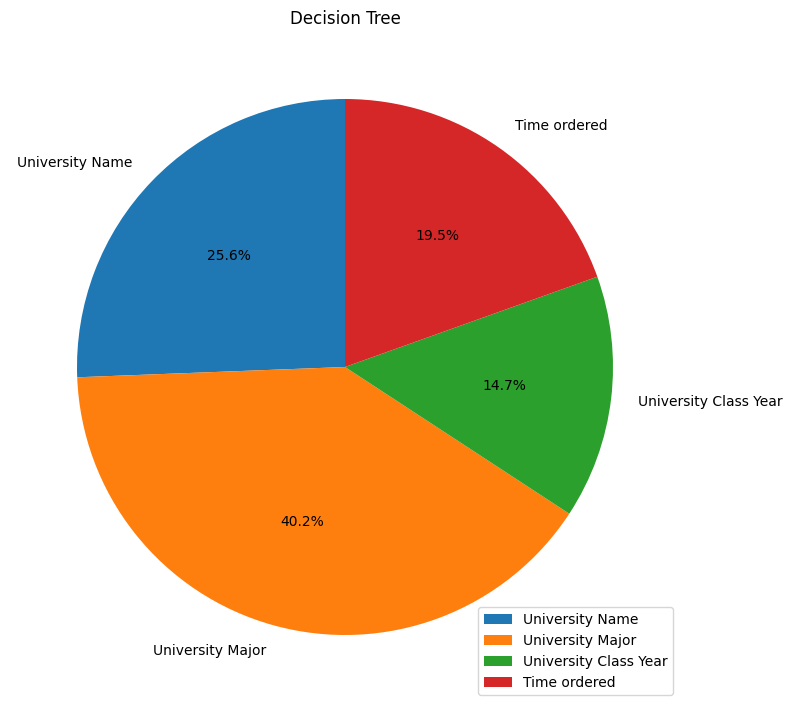

Predicitor: Decision Tree; macro f1 score: 0.6516264342194086, micro f1 score: 0.6505718594154254, accuracy: 0.655, training time: 0.009960651397705078


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import time

"""________________model + classification + prediciton__________________"""

classifier_name, classifier = "Decision Tree", DecisionTreeClassifier()

t_start = time.time()
classifier.fit(X_train, Y_train)
t_end = time.time()

t_diff = t_end - t_start
preds = classifier.predict(X_test)


feature_names = ["University Name", "University Major", "University Class Year", "Time ordered"]
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.rcParams['figure.figsize'] = [14, 7]
plt.pie(importance, labels=feature_names, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.legend(feature_names, loc="lower right")
plt.title(classifier_name)
plt.show()

report = classification_report(Y_test, preds, output_dict=True)
print(f'Predicitor: {classifier_name}; macro f1 score: {report["macro avg"]["f1-score"]}, micro f1 score: {report["weighted avg"]["f1-score"]}, accuracy: {report["accuracy"]}, training time: {t_diff}')


In [7]:
import _pickle as cPickle

with open ('order_class_model.pkl', "wb") as input_file:
  cPickle.dump(classifier, input_file)
